# <font color='lightblue'>ROSSMANN Stores Sales Predictions</font>

# Summary

1. Context
2. Challenge
3. Solution Development
4. Conclusion and Demonstration
5. Next Steps

# <font color='lightblue'>1. Context</font>

- Monthly Results Meeting
- CFO asked for a Sales Forecast for the Next 6 Weeks for each Store

# <font color='lightblue'>2. Challenge</font>

## Problem
- Budget definition for store renovation

## Causes
- Current sales forecasts were highly inconsistent.

- The sales forecast process is based on past experiences.

- All sales forecasts are made manually by Rossmann's 1,115 stores.

- Sales viewing is limited to computers.

# Solution

- Using Machine Learning to forecast sales for all stores

- Sales predictions can be viewed on a smartphone.

# <font color='lightblue'>3. Solution Development</font>

## Data Description

### Data Dimension

In [ ]:
print('Number of Rows {}'.format(df1.shape[0]))
print('Number of Cols {}'.format(df1.shape[1]))

Number of Rows 1017209
Number of Cols 18


### Descriptive Statistics

In [ ]:
get_first_order_statistics(num_attributes)

attributes     min       max     range         mean  \
0                          store     1.0    1115.0    1114.0   558.429727   
1                    day_of_week     1.0       7.0       6.0     3.998341   
2                          sales     0.0   41551.0   41551.0  5773.818972   
3                      customers     0.0    7388.0    7388.0   633.145946   
4                           open     0.0       1.0       1.0     0.830107   
5                          promo     0.0       1.0       1.0     0.381515   
6                 school_holiday     0.0       1.0       1.0     0.178647   
7           competition_distance    20.0  200000.0  199980.0  5935.442677   
8   competition_open_since_month     1.0      12.0      11.0     6.786849   
9    competition_open_since_year  1900.0    2015.0     115.0  2010.324840   
10                        promo2     0.0       1.0       1.0     0.500564   
11             promo2_since_week     1.0      52.0      51.0    23.619033   
12             promo2_since_year  2009.0    2015.0       6.0  2012.793297   
13                      is_promo     0.0       1.0       1.0     0.155231   

    median           std       skew    kurtosis  
0    558.0    321.908493  -0.000955   -1.200524  
1      4.0      1.997390   0.001593   -1.246873  
2   5744.0   3849.924283   0.641460    1.778375  
3    609.0    464.411506   1.598650    7.091773  
4      1.0      0.375539  -1.758045    1.090723  
5      0.0      0.485758   0.487838   -1.762018  
6      0.0      0.383056   1.677842    0.815154  
7   2330.0  12547.646829  10.242344  147.789712  
8      7.0      3.311085  -0.042076   -1.232607  
9   2012.0      5.515591  -7.235657  124.071304  
10     1.0      0.500000  -0.002255   -1.999999  
11    22.0     14.310057   0.178723   -1.184046  
12  2013.0      1.662657  -0.784436   -0.210075  
13     0.0      0.362124   1.904152    1.625796

- Rossmann was founded in 1972. Values of Competition_open_since_year lower than 1972 indicate the years when closest competitors, from other pharmacy chains, were opened.

- The competition_distance variable has high positive values of skew and kurtosis, indicating that the distribution is skewed right and has a large tail.

- There is a vast difference in the range in some features. Higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training some models. It's needed to apply some sort of scaling over the features.

## Mind Map Hypothesis

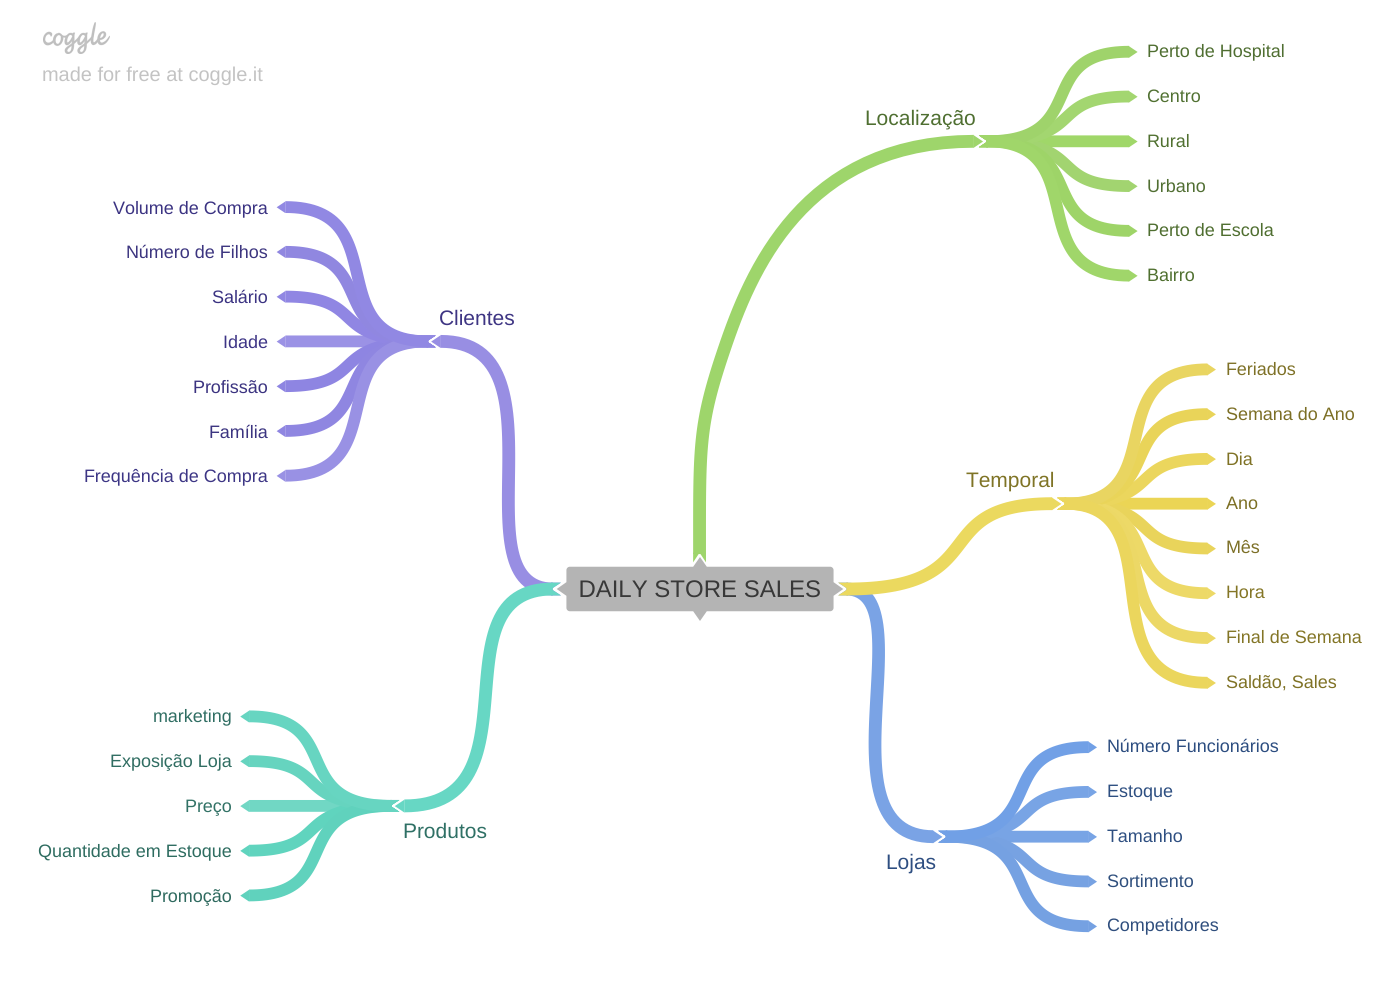

In [ ]:
Image("./img/mind_map_hypothesis.png")

## Exploratory Analysis Hypotheses

**H1.** On average, stores with a larger assortment should sell more.

**H2.** Stores with closer competitors should sell less.

**H3.** Stores with competitors that have been around for longer should sell more.

**H4.** Stores with more consecutive promotions should sell more than stores with regular promotion

**H5.** Stores open during the Christmas holidays should sell more.

**H6.** Stores should sell more over the years.

**H7.** Stores should sell more in the second half of the year

**H8.** Stores should sell less after the 10th of each month.

**H9.** Stores should sell more on average on weekends.

**H10.** Stores should sell less during school holidays.

## Exploratory Data Analysis

### Response Variable

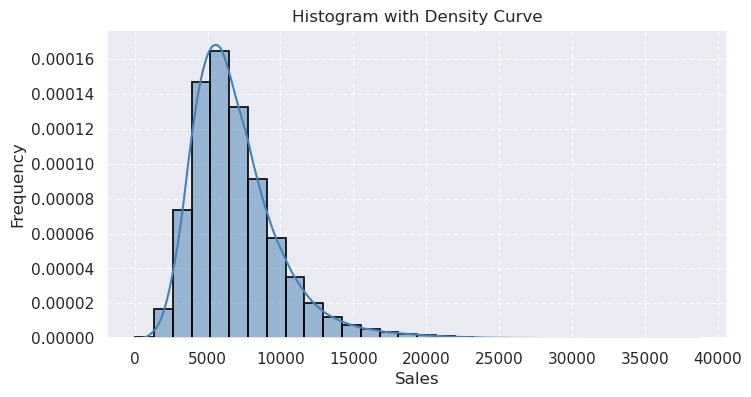

In [ ]:
# Criando o histograma e a curva de densidade
plt.figure(figsize=(8, 4))
sns.histplot(X_train['sales'], bins=30, kde=True, stat="density", color='steelblue', edgecolor='black', linewidth=1.2)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram with Density Curve')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Numerical Variables

/tmp/ipykernel_50303/2232118446.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  num_attributes.hist(bins=25, ax=ax);


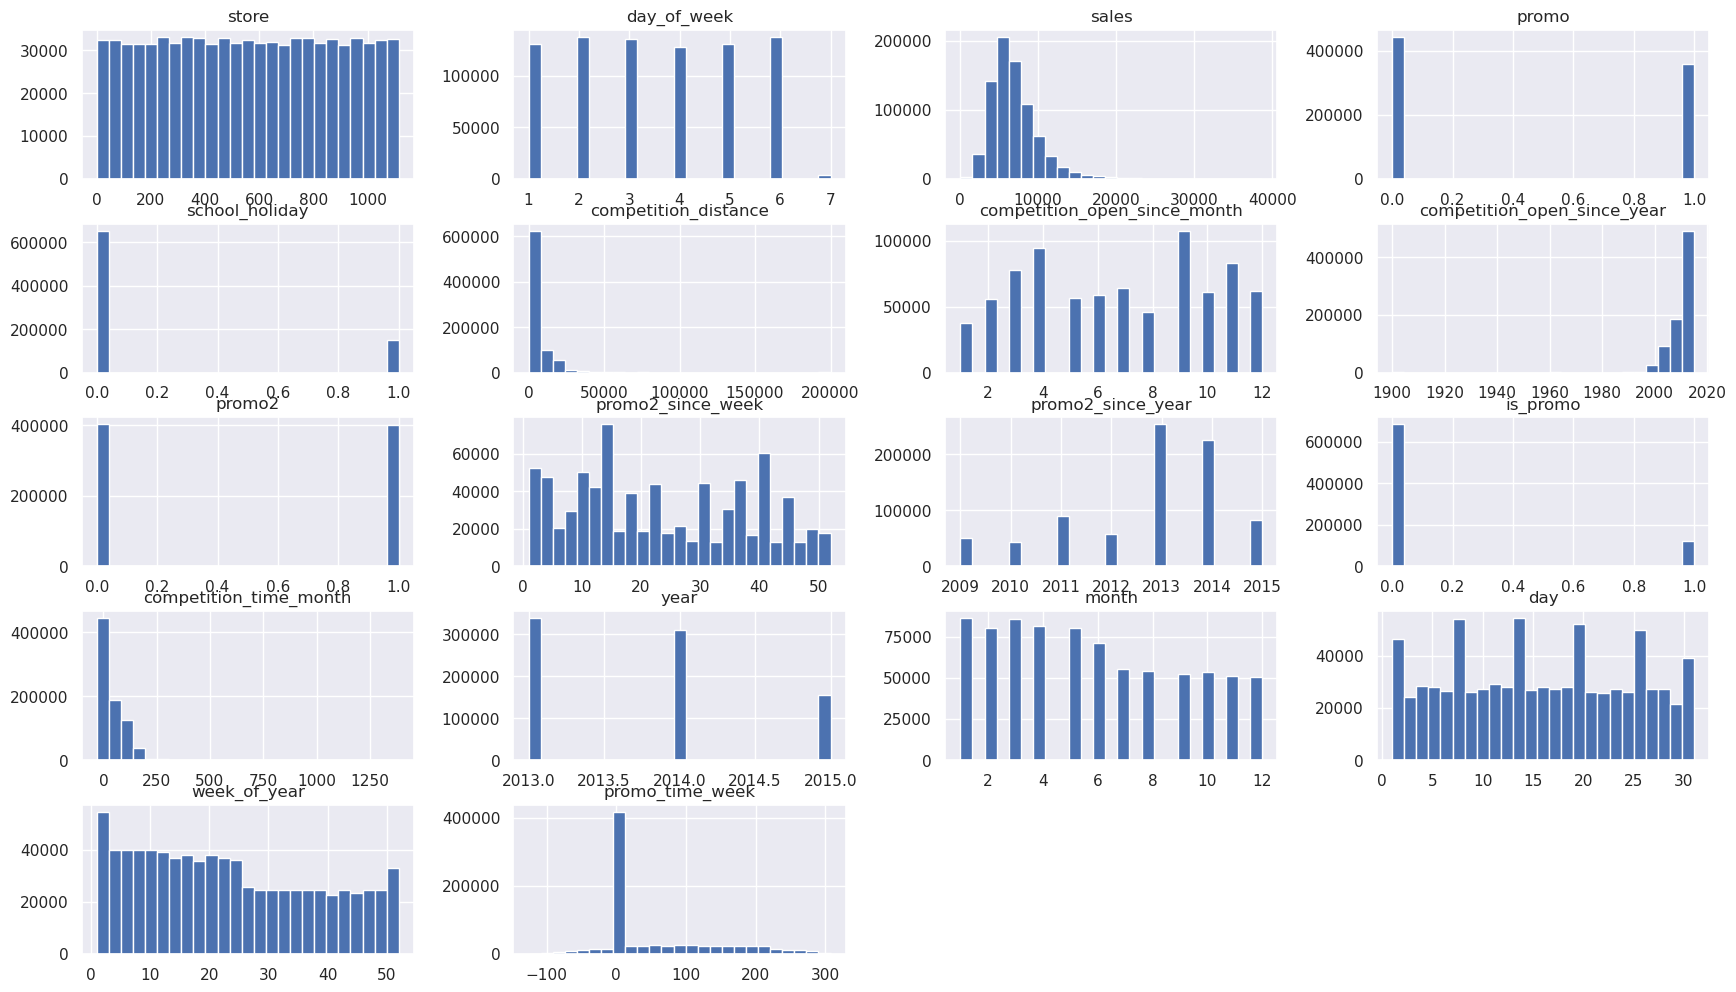

In [ ]:
num_attributes = X_train.select_dtypes(include=['int64', 'float64']);

fig = plt.figure(figsize=(21,12));
ax = fig.add_subplot();

num_attributes.hist(bins=25, ax=ax);

###  Categorical Variables

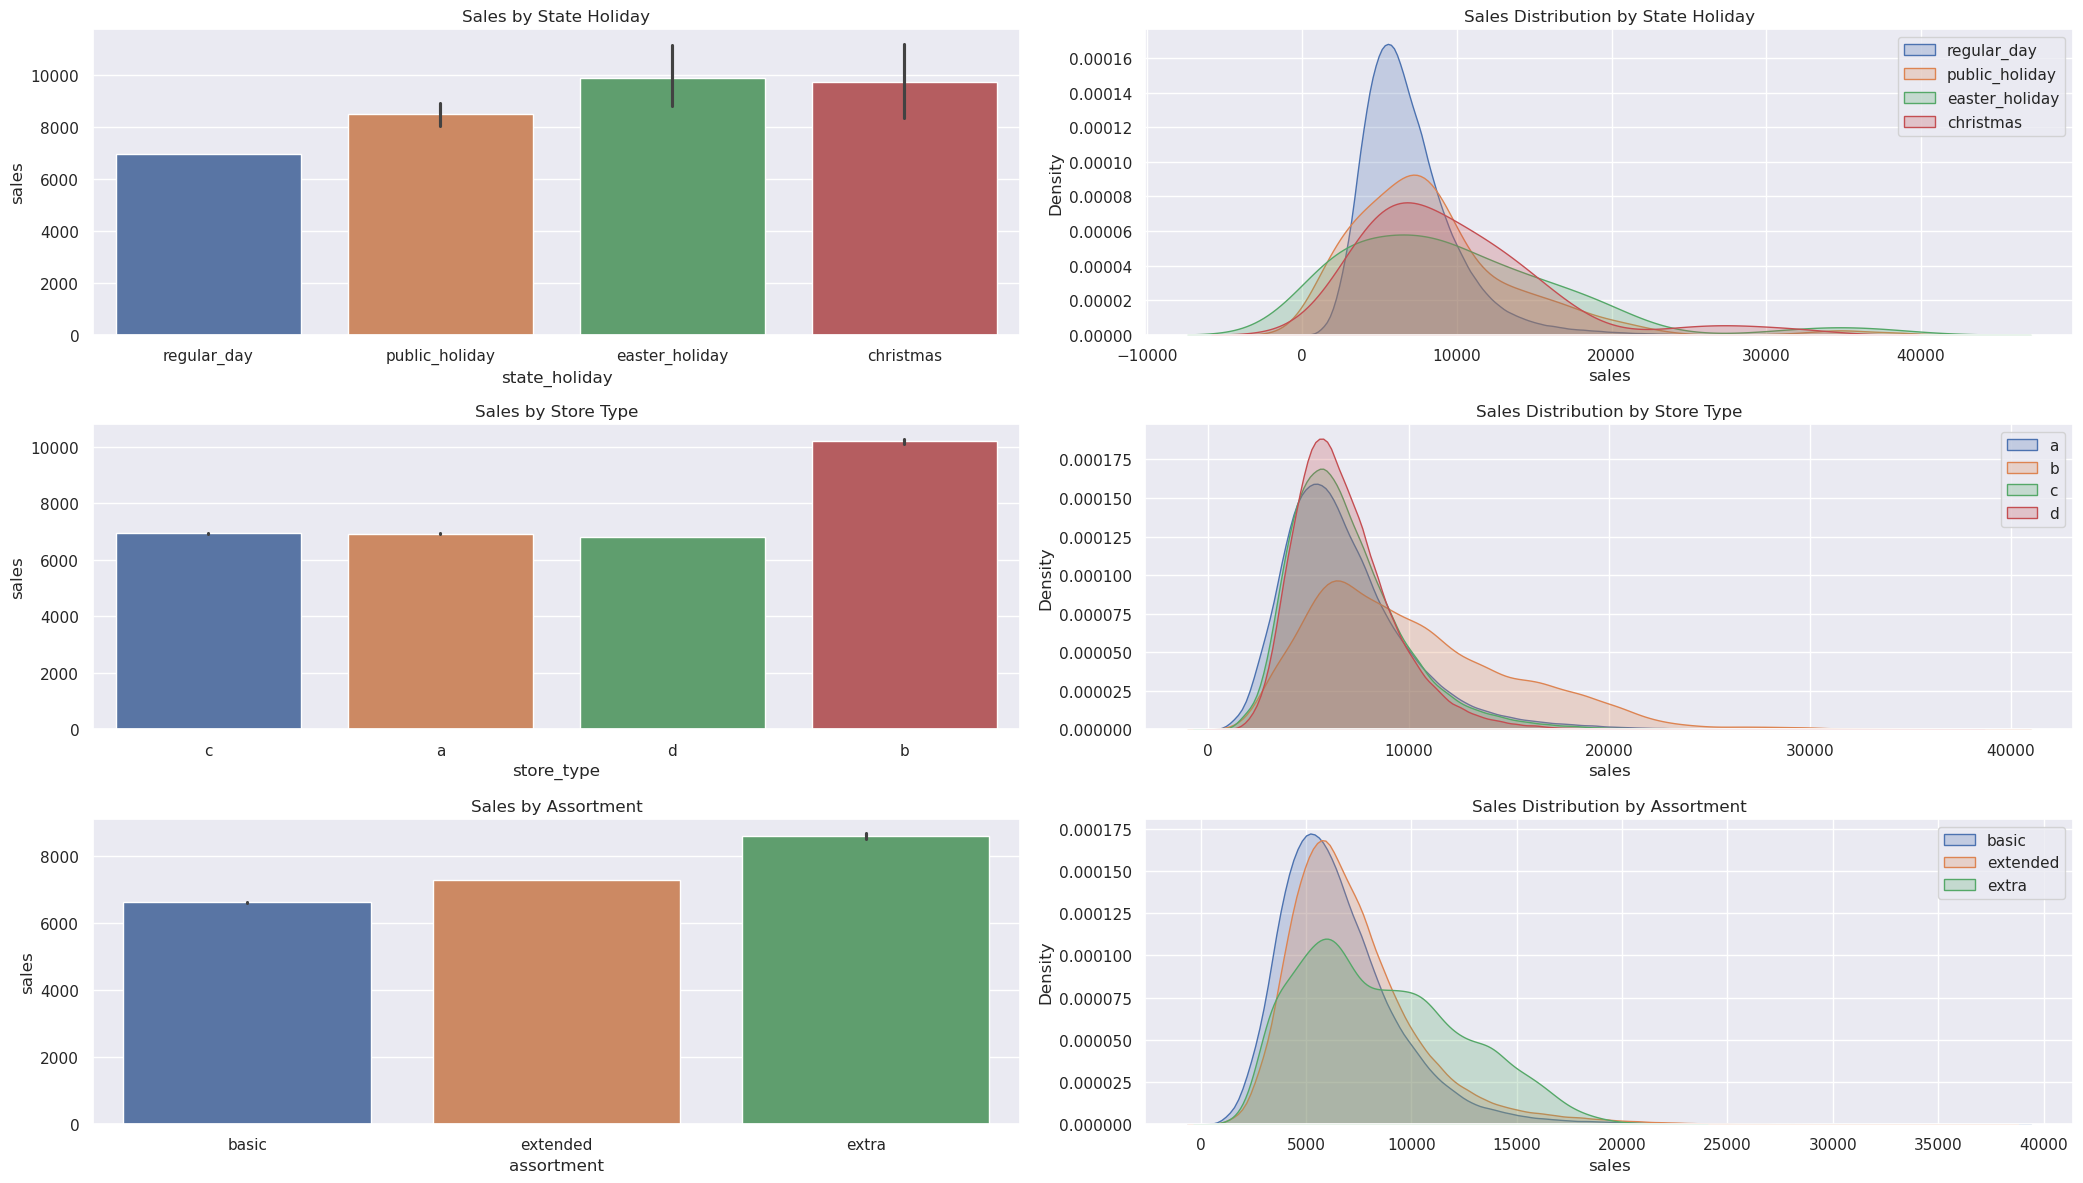

In [ ]:
fig = plt.figure(figsize=(21,12))

plt.subplot(3, 2, 1)
sns.barplot(x='state_holiday', y='sales', hue='state_holiday', data=X_train)
plt.title('Sales by State Holiday')

# plots de densidade de distribuição
plt.subplot(3, 2, 2)
sns.kdeplot(X_train[X_train['state_holiday'] == 'regular_day']['sales'], label='regular_day', fill= True)
sns.kdeplot(X_train[X_train['state_holiday'] == 'public_holiday']['sales'], label='public_holiday', fill= True)
sns.kdeplot(X_train[X_train['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday', fill= True)
sns.kdeplot(X_train[X_train['state_holiday'] == 'christmas']['sales'], label='christmas', fill= True)
plt.legend()
plt.title('Sales Distribution by State Holiday')

plt.subplot(3, 2, 3)
sns.barplot(x='store_type', y='sales', hue='store_type', data=X_train)
plt.title('Sales by Store Type')

plt.subplot(3, 2, 4)
# plots de densidade de distribuição
sns.kdeplot(X_train[X_train['store_type'] == 'a']['sales'], label='a', fill= True)
sns.kdeplot(X_train[X_train['store_type'] == 'b']['sales'], label='b', fill= True)
sns.kdeplot(X_train[X_train['store_type'] == 'c']['sales'], label='c', fill= True)
sns.kdeplot(X_train[X_train['store_type'] == 'd']['sales'], label='d', fill= True)
plt.legend()
plt.title('Sales Distribution by Store Type')

plt.subplot(3, 2, 5)
sns.barplot(x='assortment', y='sales', hue='assortment', data=X_train)
plt.title('Sales by Assortment')

# plots de densidade de distribuição
plt.subplot(3, 2, 6)
sns.kdeplot(X_train[X_train['assortment'] == 'basic']['sales'], label='basic', fill= True)
sns.kdeplot(X_train[X_train['assortment'] == 'extended']['sales'], label='extended', fill= True)
sns.kdeplot(X_train[X_train['assortment'] == 'extra']['sales'], label='extra', fill= True)
plt.legend()
plt.title('Sales Distribution by Assortment')

plt.tight_layout()
plt.show()

## Hypothesis Validation

### **H1.** On average, stores with a larger assortment should sell more.

**True** stores with a larger assortment sell more on average

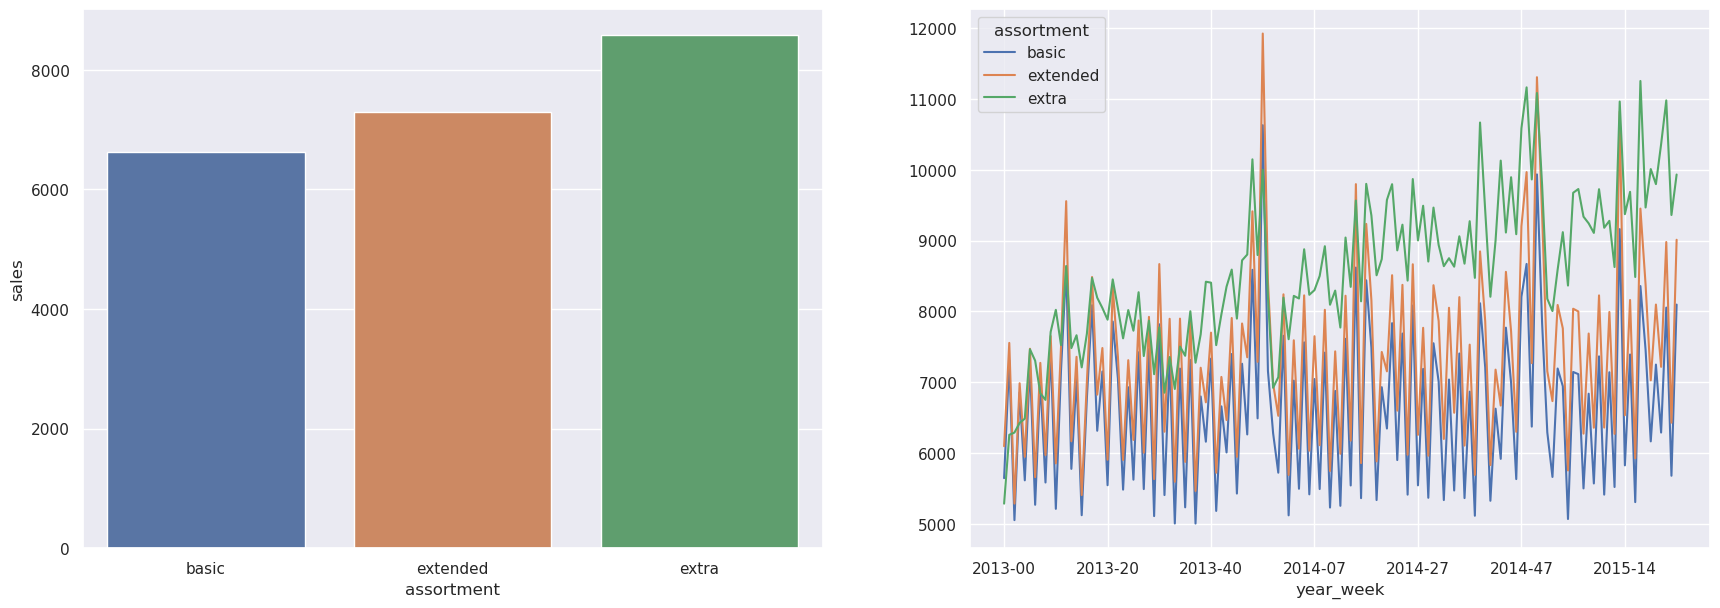

In [ ]:
fig = plt.figure(figsize=(21,7))
specs = gridspec.GridSpec(ncols=2, nrows=1, figure = fig)

ax1 = fig.add_subplot(specs[0,0])  
ax2 = fig.add_subplot(specs[0,1])   


aux1 = X_train[['assortment', 'sales']].groupby('assortment').mean().reset_index()
sns.barplot(x='assortment', y='sales', data=aux1, hue='assortment', ax=ax1); 

aux2 = X_train[['year_week', 'assortment', 'sales']].groupby(['year_week', 'assortment']).mean().reset_index()
aux2.pivot(index='year_week', columns='assortment', values='sales').plot(ax=ax2)

fig.savefig('./img/H1.png')

### **H4.** Stores with more consecutive promotions should sell more than stores with regular promotion

**Falso** Stores with more consecutive promotions sell less

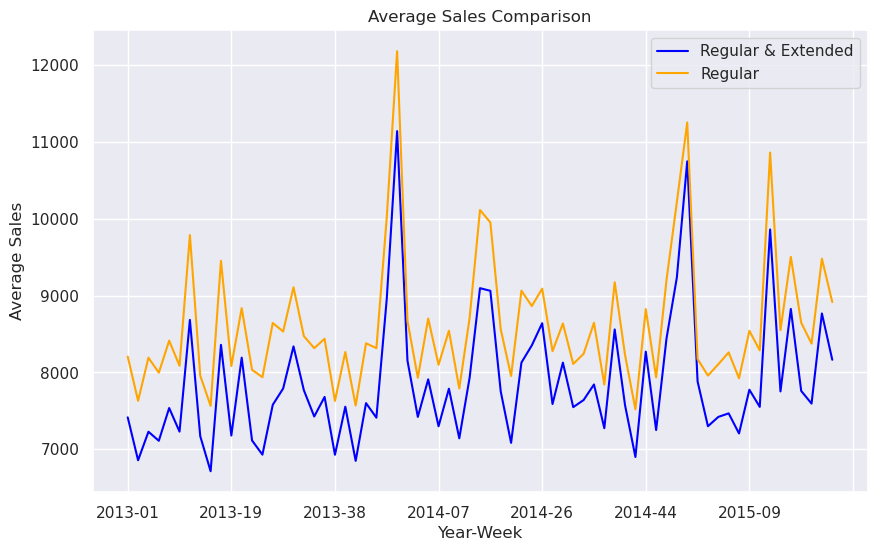

In [ ]:
aux1 = X_train[(X_train['promo'] == 1) & (X_train['promo2'] == 1)][['year_week', 'sales']].groupby('year_week').mean().reset_index()
aux2 = X_train[(X_train['promo'] == 1) & (X_train['promo2'] == 0)][['year_week', 'sales']].groupby('year_week').mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the data
aux1.plot(x='year_week', y='sales', ax=ax, label='Regular & Extended', color='blue')
aux2.plot(x='year_week', y='sales', ax=ax, label='Regular', color='orange')

# Adding legend and titles
ax.legend()
ax.set_title('Average Sales Comparison')
ax.set_xlabel('Year-Week')
ax.set_ylabel('Average Sales')

# Save the figure
fig.savefig('./img/H04.png')

# Show plot (optional)
plt.show()

### **H9.** Stores should sell more on average on weekends.

**False**, there is not enough evidence to conclude that sales on weekends are greater than sales on weekdays.

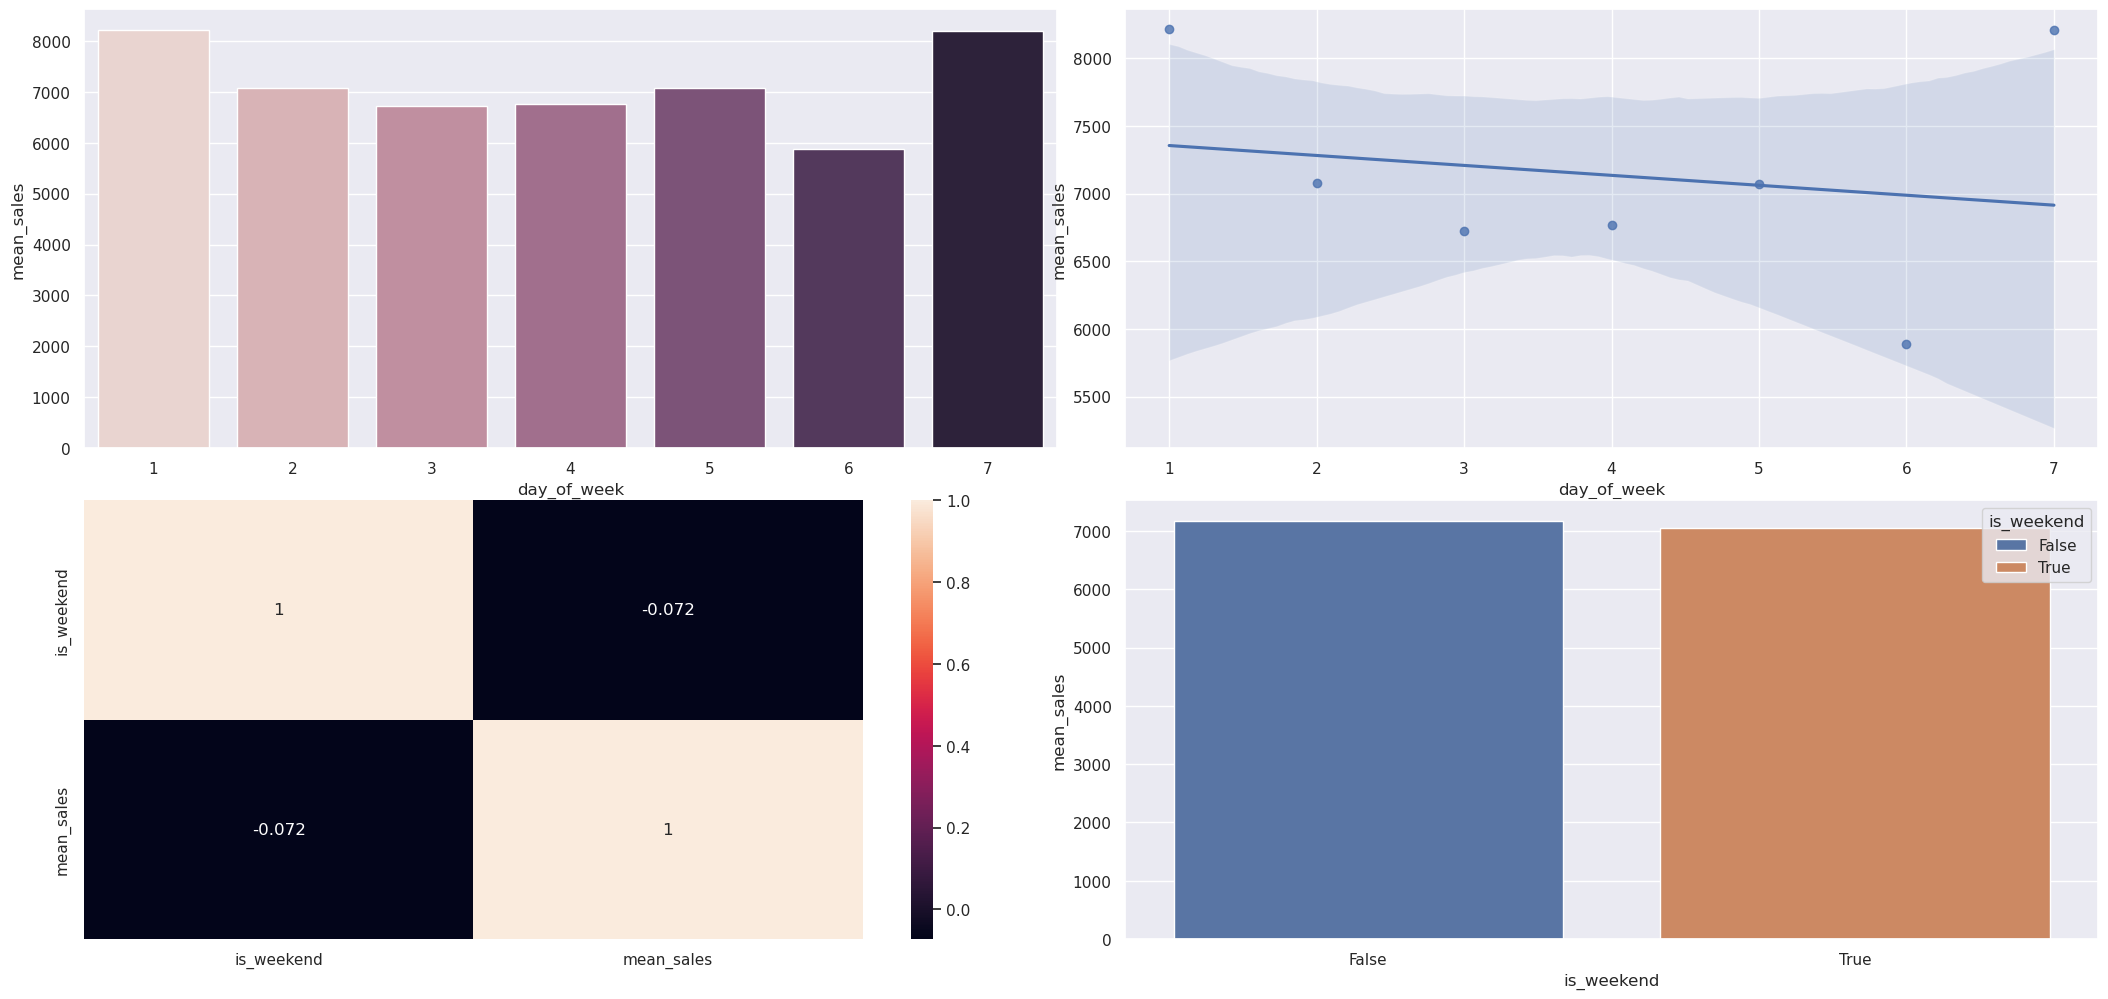

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(21,10))
fig.tight_layout()

aux1 = X_train[['day_of_week', 'sales']].groupby('day_of_week').mean().rename(columns={'sales': 'mean_sales'}).reset_index()
sns.barplot(x='day_of_week', y='mean_sales', hue='day_of_week', data=aux1, ax=ax[0,0]);
ax[0,0].legend_.remove()

sns.regplot(x='day_of_week', y='mean_sales', data=aux1, ax=ax[0,1]);

aux1['is_weekend'] = aux1['day_of_week'].apply(lambda x: True if x >= 6 else False)

sns.heatmap(aux1[['is_weekend', 'mean_sales']].corr(method='pearson'), annot=True, ax=ax[1,0]);

sns.barplot()


aux2 = aux1[['is_weekend', 'mean_sales']].groupby( 'is_weekend' ).mean().reset_index()
sns.barplot(x='is_weekend', y='mean_sales', hue='is_weekend', data=aux2, ax=ax[1,1]);



## Summary of Hypotheses

In [ ]:

tab =[['Hypotheses', 'Conclusion', 'Relevance'],
      ['H1', 'True', 'High'],  
      ['H2', 'False', 'Low'],  
      ['H3', 'False', 'Low'],
      ['H4', 'False', 'High'],
      ['H5', 'True', 'High'],
      ['H6', 'True', 'Low'],
      ['H7', 'True', 'High'],
      ['H8', 'True', 'High'],
      ['H9', 'False', 'High'],
      ['H10', 'False', 'High']
     ]  
print( tabulate( tab, headers='firstrow' ) )

Hypotheses    Conclusion    Relevance
------------  ------------  -----------
H1            True          High
H2            False         Low
H3            False         Low
H4            False         High
H5            True          High
H6            True          Low
H7            True          High
H8            True          High
H9            False         High
H10           False         High


## Multivariate Analysis

###  Numerical Attributes

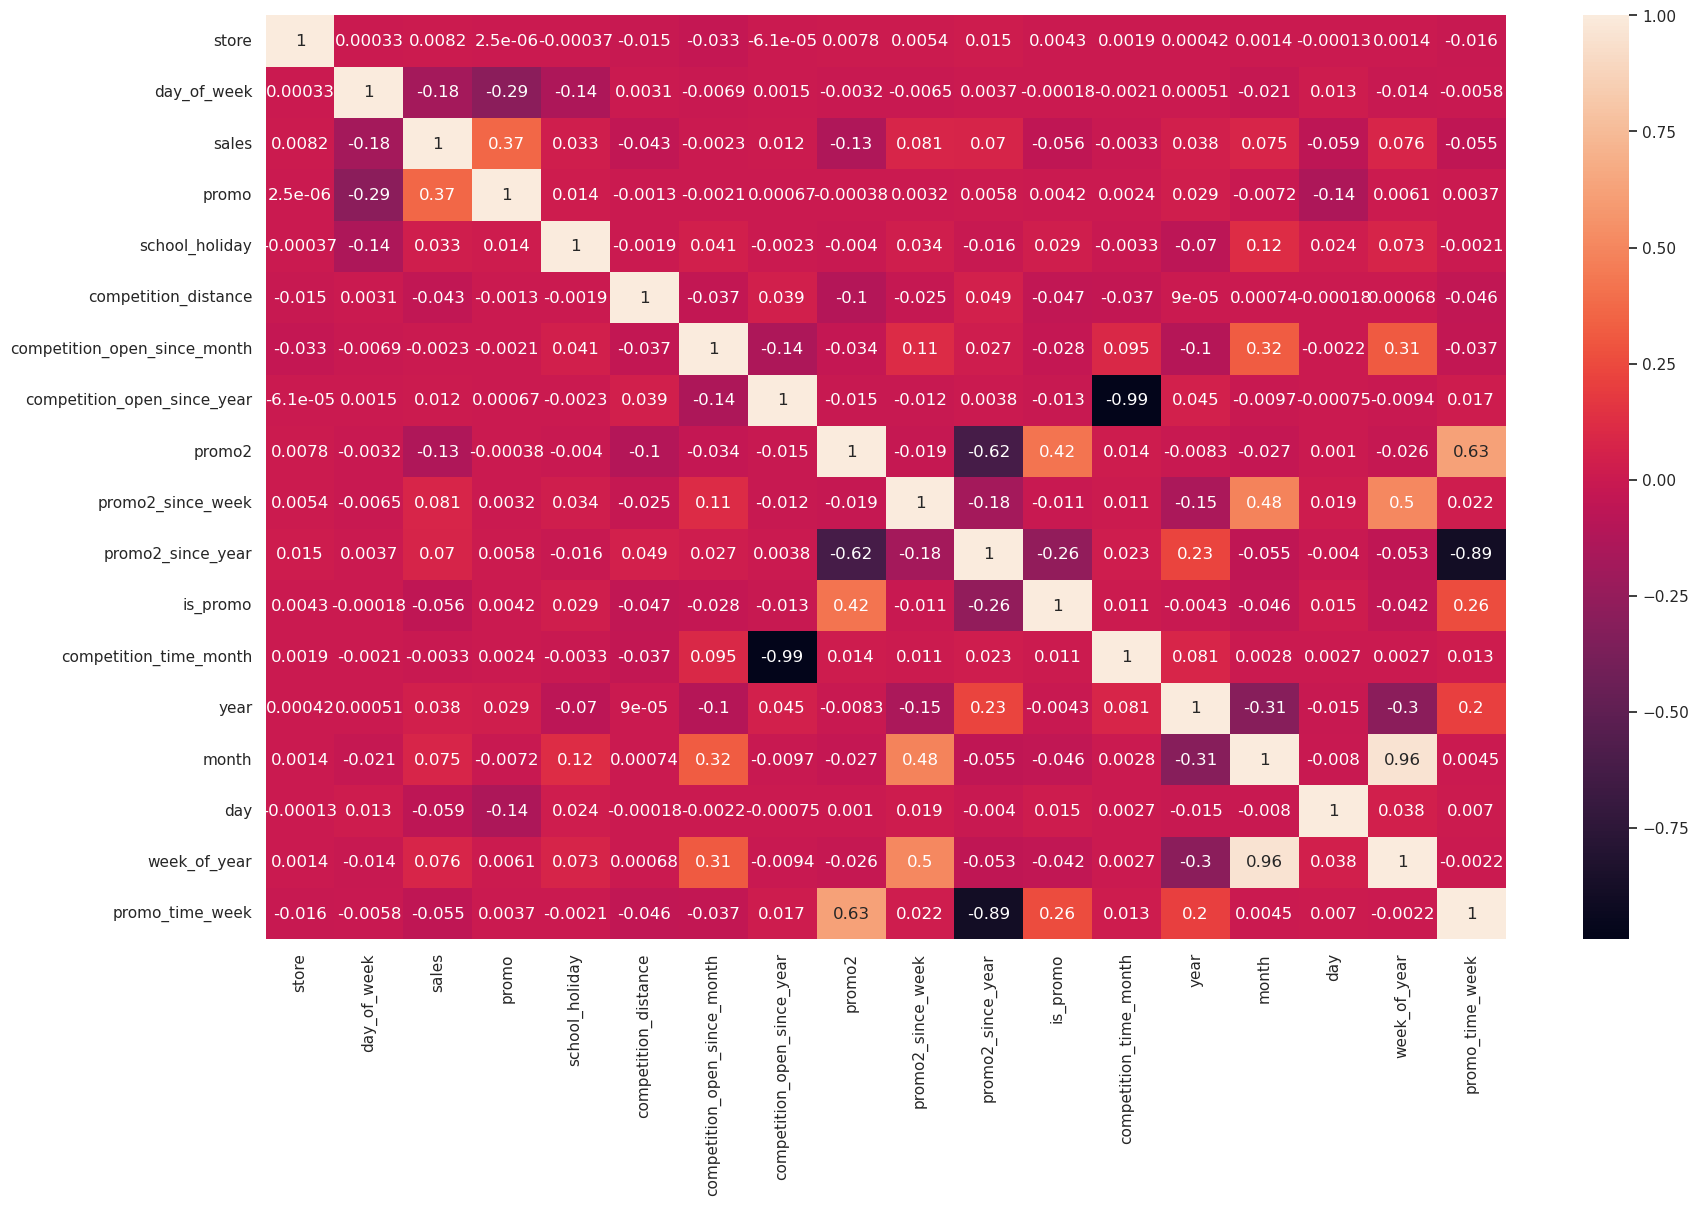

In [346]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot()
 
# plotting a triangle correlation heatmap
sns.heatmap(num_attributes.corr(method='pearson'), annot=True, ax=ax);

###  Categorical Attributes

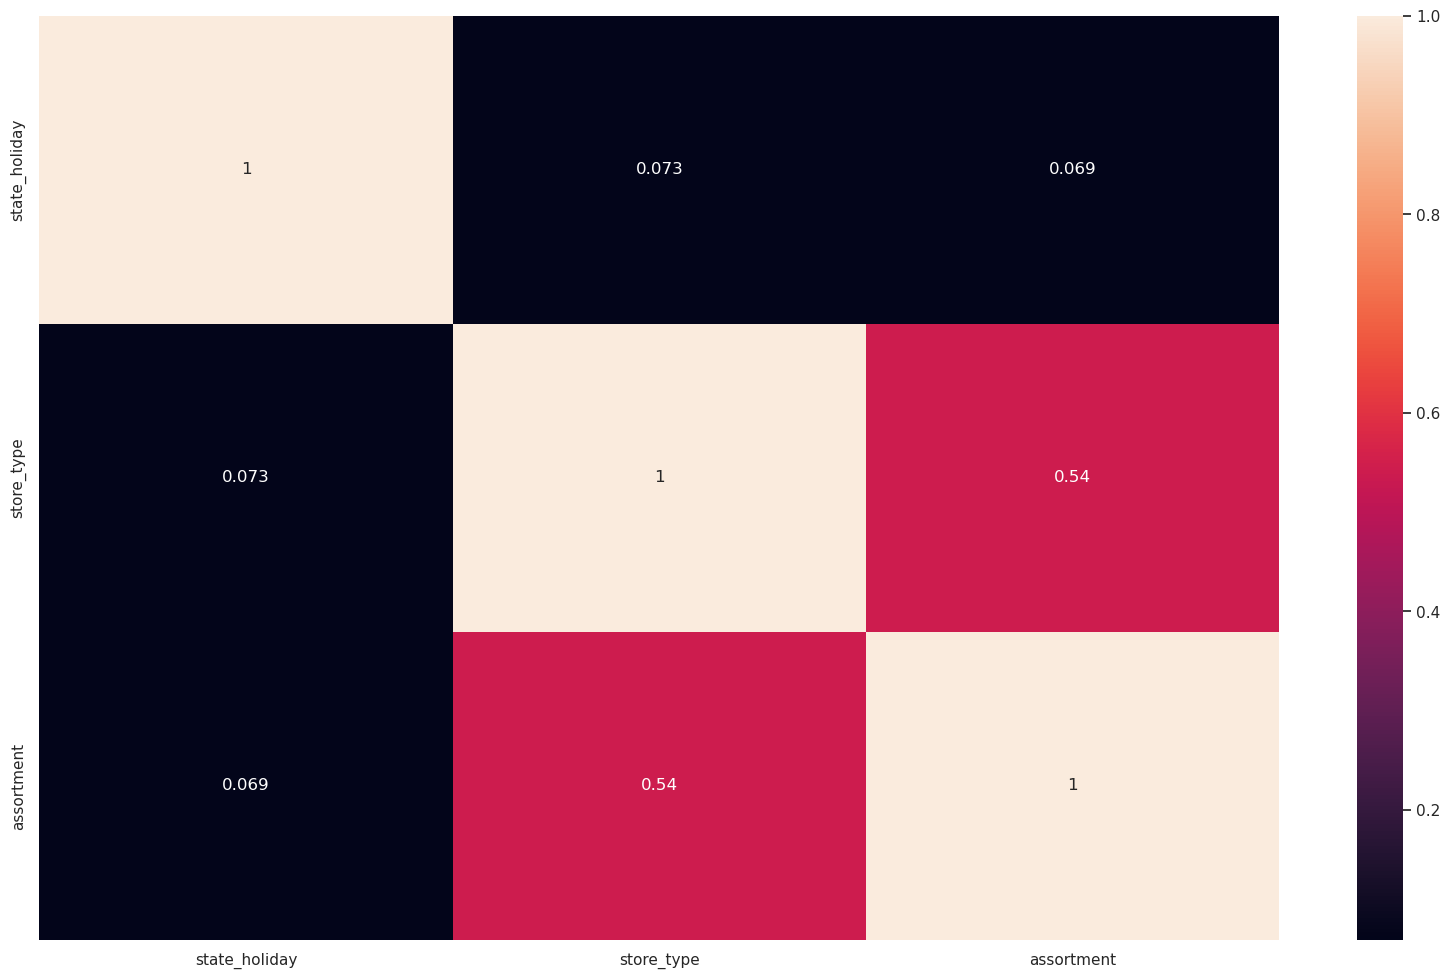

In [315]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot()

# Initialize an empty DataFrame for the results
results = pd.DataFrame(index=cat_attributes.columns, columns=cat_attributes.columns, dtype=float)

# Loop through the combinations of columns to calculate Cramér V
for col1 in cat_attributes.columns:
    for col2 in cat_attributes.columns:
        results.loc[col1, col2] = cramer_v(cat_attributes[col1], cat_attributes[col2])

# Plot heatmap
sns.heatmap(results, annot=True, ax=ax)
plt.show()

# Machine Learning Modelling

## Compare Model's Performance

In [83]:
modeling_result = pd.concat([baseline_result, lr_result, lrl_result, rf_result, xgb_result])
modeling_result.sort_values('RMSE', inplace=True)
modeling_result.reset_index(drop=True, inplace=True)
modeling_result

Model Name          MAE      MAPE         RMSE
0              XGB Regressor   694.066535  0.102831   999.914943
1    Random Forest Regressor   747.458229  0.111702  1098.595402
2              Average Model  1429.763326  0.216814  1939.328730
3          Linear Regression  1867.623495  0.296267  2657.022835
4  Linear Regression - Lasso  2192.664126  0.343490  3092.842416

# <font color='lightblue'>4. Conclusion and Demonstration</font>

##  Business Performance

In [ ]:
pd.options.display.max_rows = 10
df10_2.sort_values('MAPE', ascending=False)

store  predictions  worst_scenario  best_scenario      MAE  MAPE
291    292   108,383.78      105,018.11     111,749.45 3,365.67  0.61
908    909   244,502.50      237,037.94     251,967.06 7,464.56  0.52
875    876   200,492.30      196,658.64     204,325.96 3,833.66  0.29
721    722   356,656.97      354,564.33     358,749.61 2,092.64  0.28
594    595   383,771.44      379,840.58     387,702.29 3,930.85  0.27
..     ...          ...             ...            ...      ...   ...
493    494   326,901.41      326,470.16     327,332.65   431.25  0.06
373    374   258,871.70      258,486.16     259,257.24   385.54  0.06
561    562   747,947.50      746,976.29     748,918.71   971.21  0.06
958    959   255,862.62      255,458.45     256,266.80   404.17  0.05
259    260   232,898.20      232,580.29     233,216.12   317.91  0.05

[1115 rows x 6 columns]

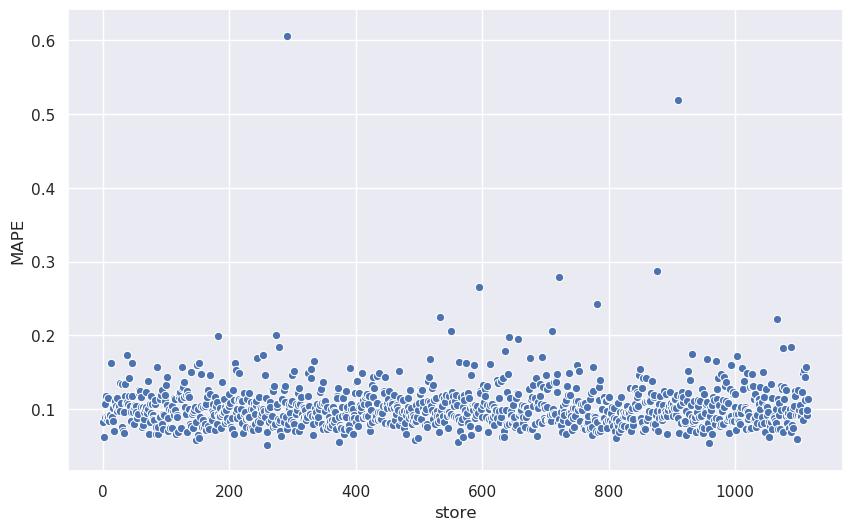

In [ ]:
plt.figure(figsize=(10, 6)) 

sns.scatterplot(x='store', y='MAPE', data=df10_2);

## Total Performance

In [ ]:
df10_3 = (df10_2[['predictions', 'worst_scenario', 'best_scenario']]
          .sum()
          .reset_index()
          .rename(columns={'index': 'Scenario', 0: 'Values'})
         )
df10_3['Values'] = df10_3['Values'].map('US${:,.2f}'.format)
df10_3

Scenario             Values
0     predictions  US$290,943,413.95
1  worst_scenario  US$290,165,597.86
2   best_scenario  US$291,721,230.03

##  Machine Learning Performance

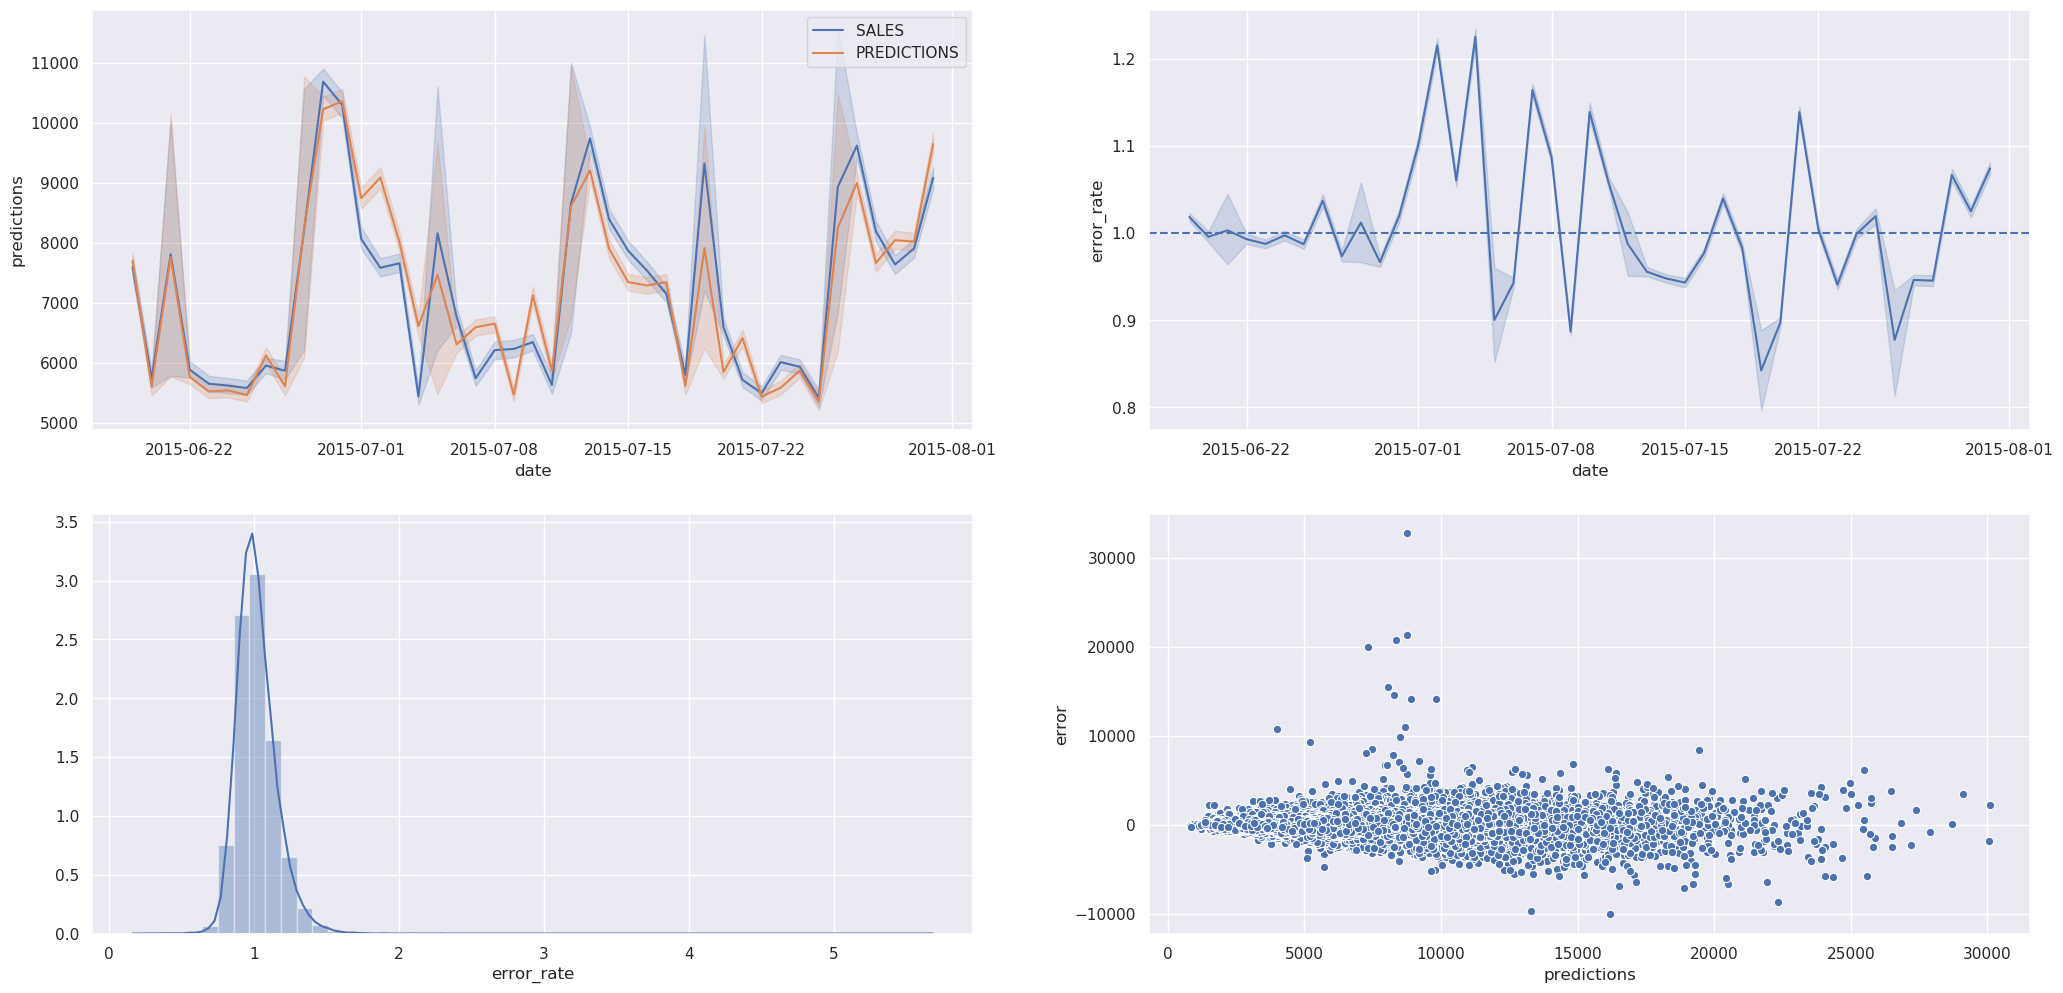

In [ ]:
plt.subplot(2, 2, 1)
sns.lineplot(x='date', y='sales', data=df10, label='SALES');
sns.lineplot(x='date', y='predictions', data=df10, label='PREDICTIONS');

plt.subplot(2, 2, 2)
graph =  sns.lineplot(x='date', y='error_rate', data=df10)
graph.axhline(1, linestyle='--')

plt.subplot(2, 2, 3)
sns.distplot(df10['error_rate']);

plt.subplot(2, 2, 4)
sns.scatterplot(x='predictions', y='error', data=df10);

# Demonstration - Telegram

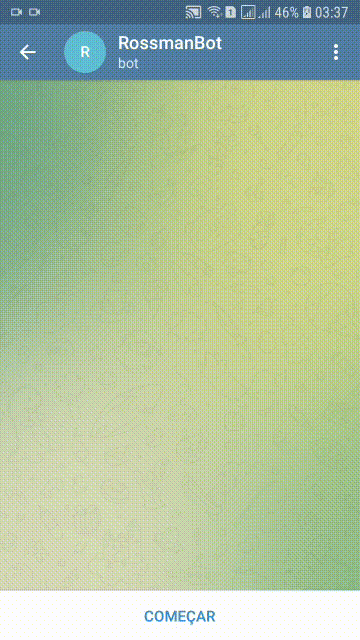

In [1]:
from IPython.display import Image

with open('../img/rossmann_bot.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

# <font color='lightblue'>5. Next Steps</font>

- Model Workshop for Business Users
- Collect Usability Feedback
- Improve model performance (MAPE) by 5%

# <font color='lightblue'>Q & A</font>

# <font color='lightblue'>Thank You Very Much!</font>